# Credit Card Default Prediction
This notebook explores and cleans the dataset, performs feature engineering, and prepares data for modeling.


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# let the notebook know where to find the data
os.chdir("C:/Users/benla/Desktop/store_sales_forecasting")



In [3]:
# first we will load the data
df_train = pd.read_csv("data/raw/train.csv", header=0)

# check out the shape and head of the dataframe
print(f"df_train shape: {df_train.shape}")
print(f"df_train head:\n{df_train.head()}")

df_train shape: (3000888, 6)
df_train head:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [4]:
print(f"missing values:\n{df_train.isnull().sum()}")

# df[df.isnull().any(axis=1)] # returns rows with at least one NAs

missing values:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


The next step is to perform EDA on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
unique store numbers
54
unique families
33
sales averages
1073644952.2030689
unique dates
1684
3000888


family
BREAD/BAKERY                  0.080606
BEVERAGES                     0.080617
MEATS                         0.080617
CLEANING                      0.080617
DAIRY                         0.080617
DELI                          0.080617
EGGS                          0.080617
GROCERY I                     0.080628
PERSONAL CARE                 0.080650
POULTRY                       0.080760
PREPARED FOODS                0.080837
FROZEN FOODS                  0.080914
GROCERY II                    0.121129
AUTOMOTIVE                    0.127848
LINGERIE                      0.160465
LIQUOR,WINE,BEER              0.178653
SEAFOOD                       0.193587
BEAUTY                        0.262822
PRODUCE                       0.283551
HOME AND KITCHEN I            0.346452
HOME AND KITCHEN II           0.347134
HOME CARE                     0.409090
CELEBRATION                   0.436340
PLAYERS AND ELECTRONICS       0.448865
LAWN AND GARDEN               0.467846
HARDWARE          

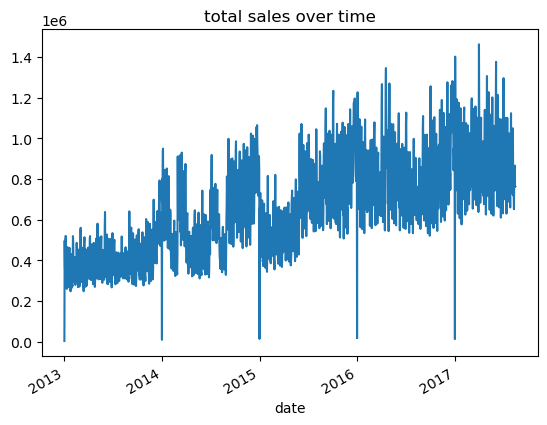

In [ ]:
# these are perhaps the first things that you should run in eda
df_train.info()
df_train.describe()

# additional things about the dataset

print('unique store numbers')
print(df_train['store_nbr'].nunique())

print('unique families')
print(df_train['family'].nunique())

print('sales averages')
print(df_train['sales'].sum())

print('unique dates')
print(df_train['date'].nunique())

#THE TAKEAWAY IS THAT THERE ARE 54 STORES, EACH WITH 33 UNIQUE FAMILIES, AND ALL THE FAMILIES ARE RECORDED THROUGH A PERIOD OF 1684 DAYS
print(1684*54*33)


# Now we will see the sales trends over time
df_train['date'] = pd.to_datetime(df_train['date']) # format it to the right date 
daily_sales = df_train.groupby('date')['sales'].sum()
daily_sales.plot(title='total sales over time') # the plot shows a relatively upward trending sales trajectory

# see how often items get sold in general, and how often items in each family get sold.
(df_train['sales'] == 0).mean()

df_train.groupby('family')['sales'].apply(lambda x: (x==0).mean()).sort_values() # so it seems that there are a lot of categories that customers buy frequently and some that are not bought frequently at all


In [ ]:
# Seeing all of the results above leads me to believe that the following features will be useful:

WORKING HERE

df_train['average_store_sales = ']

<Axes: >

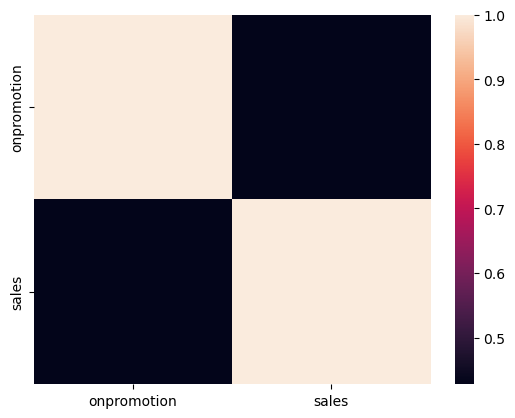

In [6]:
# correlation matrix
df_train_simplified = df_train[['onpromotion', 'sales']]
corr_matrix = df_train_simplified.corr()
sns.heatmap(corr_matrix)

# it seems like this will be hard to make a correlation matrix


In [7]:
# now see if there is any correlation between the features of the df
corr_matrix = df.corr()
strong_corr_matrix = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
strong_corr_matrix

# now to see if there is any clear and strong correlation between the features and the labels
last_col = corr_matrix.iloc[-1]
last_col

sns.heatmap(df)
sns.heatmap(corr_matrix) # some of these are still not dummies 

NameError: name 'df' is not defined

After EDA is performed and we see that there is no simple correlation between the variables, we will now proceed to building predictive models

In [ ]:
# now, some of the columns have nomical categorical feature, and in this case we have to encode them into something that our model can more easily understand (unless we are using trees or something)
# for example, Marrital_status goes from 1 for married, 2 for single, and 3 for other. We want to turn this into 3 binary columns using one hot encoding

(24000, 24)
(24000,)
accuracy: 0.819
confusion matrix:
 [[4436  237]
 [ 849  478]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



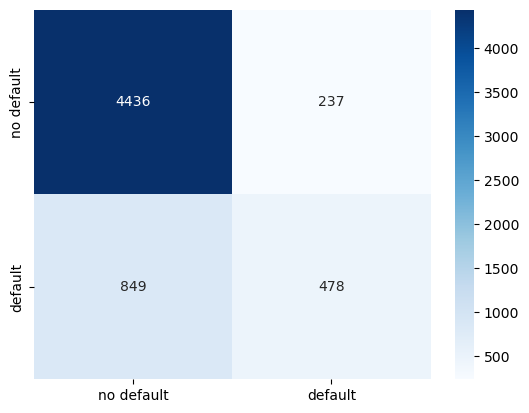

In [ ]:
# the first model that I want to build will be the xgboost since it will run without needing any further dummy variables/encodings, and can also deal with NANs (even though there are none in this case)



# the firs thing that I will have to do is make the target column y, and then drop it to make X
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]

# it is also good for me to test and make sure that there is some balance in the classes of y
y.value_counts() # 0 -> 23364, 1-> 6636
# since this is relatively unbalanced, this means that I should stratify to make sure that we are balanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)

# now that we have split the testing and training data, it is time to make the actual models.
model = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    learning_rate=0.1,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('accuracy:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n', cm)
labels = ['no default', 'default']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

print(classification_report(y_test, y_pred))